We need to determine the minimal amount of iteratoins needed to get an accurate count of surface areas at each resolution. At 512x512 you should not need many iterations to be accurate, but at 2048x2048 it will matter a lot. It would be ideal to get at equation for max-iter based on resolution.

In [1]:
import duckdb 
import optimized_fractals as of
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Find the fractals with the highest surface area
conn = duckdb.connect("FractalData.duckdb")
rand_parameters = conn.execute("SELECT * EXCLUDE(surface_area, size) FROM StartingParameters WHERE surface_area > 10 USING SAMPLE 200 ROWS").fetchall()
conn.close()

In [9]:
surface_area_history = []
resolution = 512

for parameters in rand_parameters:

    surface_areas = []

    for iter in range(1,21):

        # Find surface area at max_iter = iter*20
        surface_areas.append(
            of.coolness_raw(resolution, resolution, 4.0 / resolution, 0.0, 0.0, 20*iter, parameters)[0]
        )

    surface_area_history.append(surface_areas.copy())



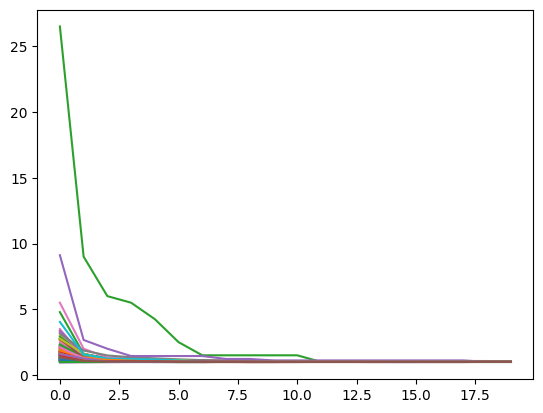

On average you need 
88.27586206896552
max-iter to get withing 5 percent of the real surface area


In [10]:
for history in surface_area_history:
    plt.plot([surf / history[-1] for surf in history])

plt.show()


close_count = 0

for history in surface_area_history:
    i = 0
    while i < len(history):
        i += 1
        if abs(history[i] - history[-1]) / history[-1] < .05:
            break
    close_count += i+1

print("On average you need ")
print(close_count*20/len(surface_area_history)) 
print("max-iter to get withing 5 percent of the real surface area")

In [11]:
def res_to_iter(resolution, iter_max, iter_steps):

    surface_area_history = []

    iter_step = iter_max / iter_steps

    for parameters in rand_parameters:

        surface_areas = []

        for iter in range(1,iter_steps):

            # Find surface area at max_iter = iter*20
            surface_areas.append(
                of.coolness_raw(resolution, resolution, 4.0 / resolution, 0.0, 0.0, int(iter*iter_step), parameters)[0]
            )

        surface_areas.append(of.coolness_raw(resolution, resolution, 4.0 / resolution, 0.0, 0.0, 1000, parameters)[0])

        surface_area_history.append(surface_areas.copy())

    close_count = 0

    for history in surface_area_history:
        i = 0
        while i < len(history):
            if abs(history[i] - history[-1]) / history[-1] < .05:
                break
            i += 1
        close_count += i+1

    return(close_count*iter_step/len(surface_area_history)) 

In [12]:
iter_history = []

for i in range(300, 3000, 100):

    print(i)

    iter_history.append(res_to_iter(i, 800, 30))

300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


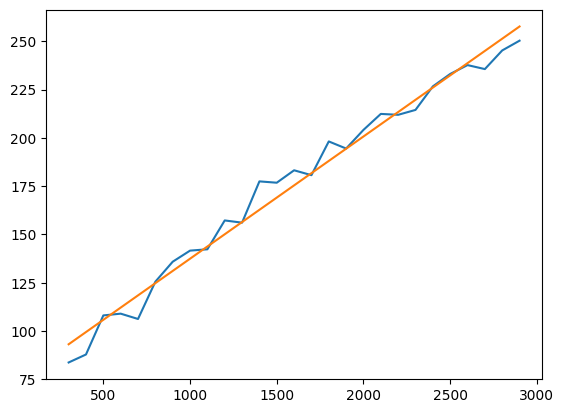

In [17]:
xRange = [300 + 100*i for i in range(len(iter_history))]
plt.plot(xRange, iter_history)
line = np.polyfit(xRange, iter_history, 1)
plt.plot(xRange, [x*line[0] + line[1] for x in xRange])

In [ ]:
# LINE OF BEST FITTT
np.polyfit([300 + 100*i for i in range(len(iter_history))], iter_history, 1)

# Use 8 + (.63)*x

array([6.33054047e-02, 7.41136514e+01])